In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import sqlite3
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

In [311]:
# Load the dataset
file_path = '/content/Sales Dataset.csv'
#sales_data = pd.read_csv(file_path)
sales_data = pd.read_csv('/content/clean_sales_Data.csv')


In [312]:
sales_data.info()
sales_data.describe()
sales_data.head()
# Clean the data

# Remove duplicates
df_cleaned = sales_data.drop_duplicates()

# Handle missing values
for col in df_cleaned.select_dtypes(include=['int', 'float']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Correct wrong data (clipping outliers)
for col in df_cleaned.select_dtypes(include=['int', 'float']).columns:
    df_cleaned[col] = df_cleaned[col].clip(lower=df_cleaned[col].quantile(0.01), upper=df_cleaned[col].quantile(0.99))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   float64
 1   CustomerID          1000 non-null   float64
 2   Age                 1000 non-null   float64
 3   Gender              1000 non-null   object 
 4   Location            1000 non-null   object 
 5   ProductCategory     1000 non-null   object 
 6   PurchaseDate        1000 non-null   object 
 7   PurchaseAmount      1000 non-null   float64
 8   PaymentMethod       1000 non-null   object 
 9   Quantity            1000 non-null   int64  
 10  DiscountPercentage  1000 non-null   float64
 11  IsReturned          1000 non-null   bool   
 12  Rating              1000 non-null   int64  
 13  IsPromotion         1000 non-null   bool   
 14  CustomerSegment     1000 non-null   object 
 15  ShippingDuration    1000 non-null   float64
 16  Region 

In [313]:
# Group data by ProductCategory and calculate the sum and mean of PurchaseAmount
category_stats = sales_data.groupby('ProductCategory')['PurchaseAmount'].agg(['sum', 'mean'])

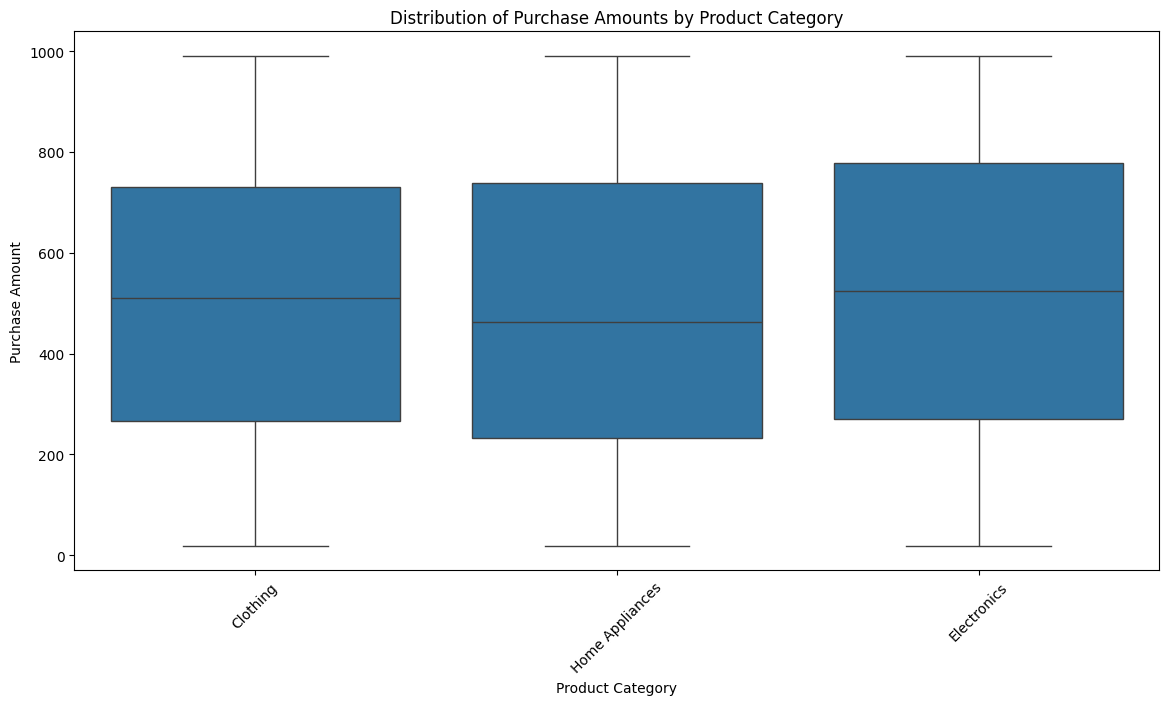

In [314]:
# Plotting the distribution of Purchase amounts across different product categories
plt.figure(figsize=(14, 7))
sns.boxplot(x='ProductCategory', y='PurchaseAmount', data=sales_data)
plt.title('Distribution of Purchase Amounts by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.show()


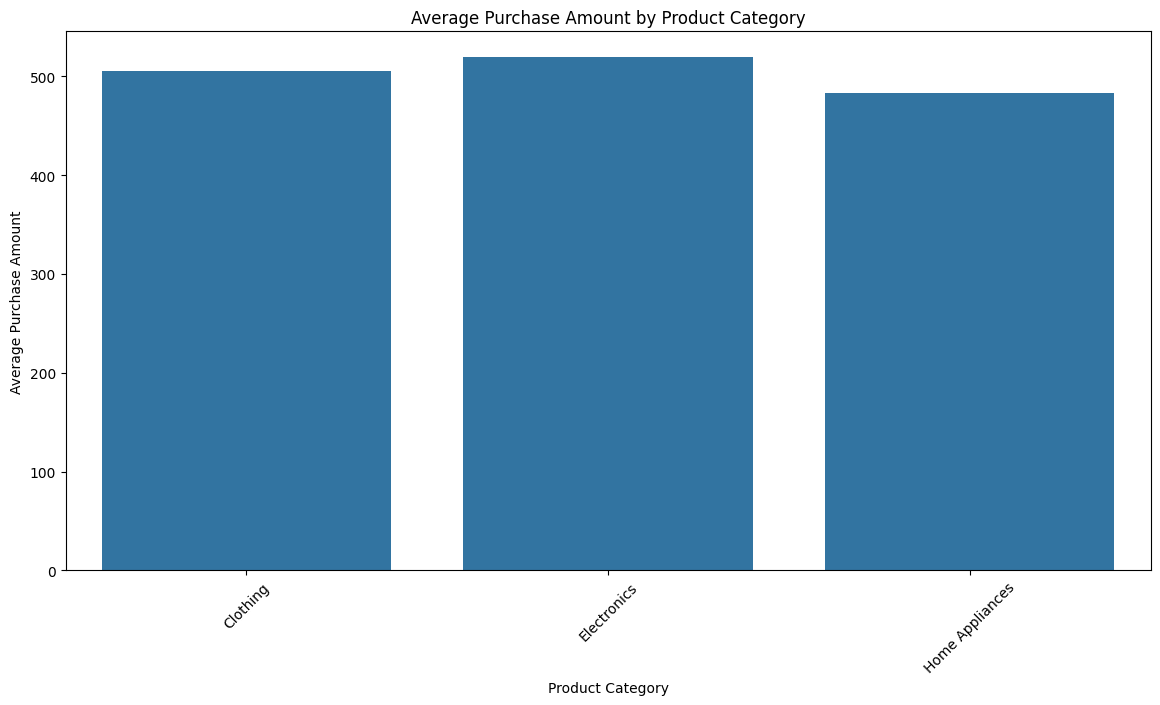

In [315]:
# Plotting the average purchase amount for each product category
plt.figure(figsize=(14, 7))
sns.barplot(x=category_stats.index, y='mean', data=category_stats)
plt.title('Average Purchase Amount by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.show()


In [316]:
# Find the product categories with the highest and lowest total purchase amounts
highest_purchase_category = category_stats['sum'].idxmax()
lowest_purchase_category = category_stats['sum'].idxmin()

print(f"Product category with the highest total purchase amount: {highest_purchase_category}")
print(f"Product category with the lowest total purchase amount: {lowest_purchase_category}")
print("\nAverage purchase amount by product category:")
print(category_stats['mean'])


Product category with the highest total purchase amount: Electronics
Product category with the lowest total purchase amount: Clothing

Average purchase amount by product category:
ProductCategory
Clothing           505.124832
Electronics        519.518600
Home Appliances    482.756999
Name: mean, dtype: float64


Problem statment 2

In [317]:
# Group data by CustomerSegment and calculate the average rating
segment_ratings = sales_data.groupby('CustomerSegment')['Rating'].mean().reset_index()

In [318]:
# Find the customer segments with the highest and lowest average ratings
highest_rating_segment = segment_ratings.loc[segment_ratings['Rating'].idxmax()]
lowest_rating_segment = segment_ratings.loc[segment_ratings['Rating'].idxmin()]

print(f"Customer segment with the highest average rating: {highest_rating_segment['CustomerSegment']} ({highest_rating_segment['Rating']:.2f})")
print(f"Customer segment with the lowest average rating: {lowest_rating_segment['CustomerSegment']} ({lowest_rating_segment['Rating']:.2f})")


Customer segment with the highest average rating: Returning (2.95)
Customer segment with the lowest average rating: New (2.90)


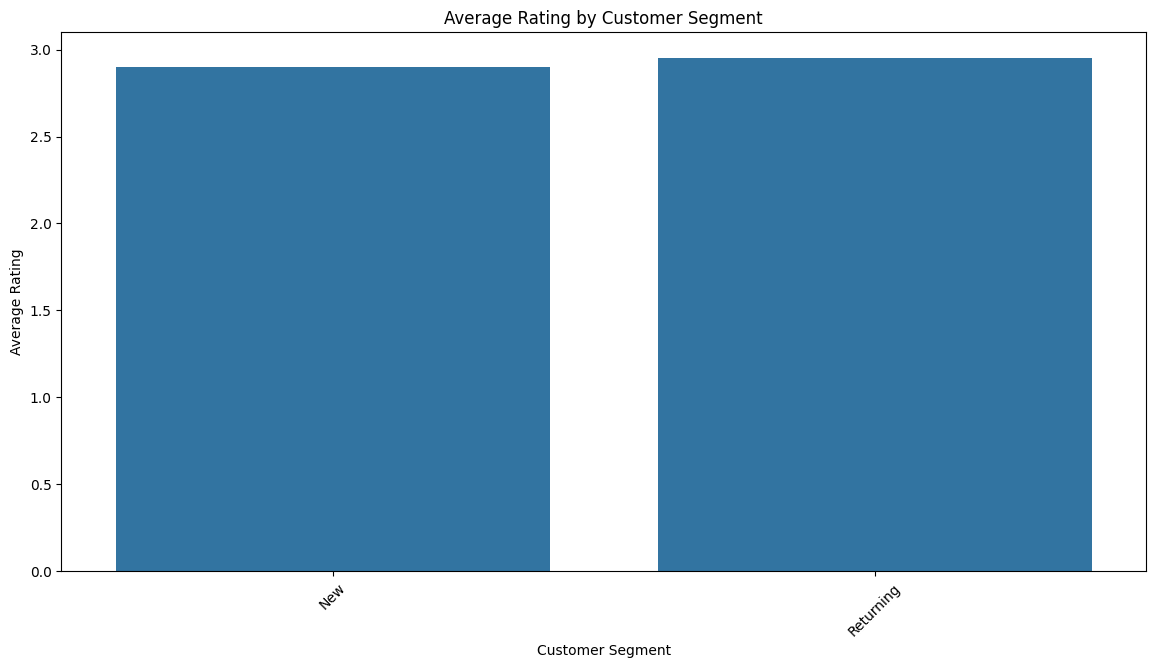

In [319]:
# Plotting the average rating for each customer segment
plt.figure(figsize=(14, 7))
sns.barplot(x='CustomerSegment', y='Rating', data=segment_ratings)
plt.title('Average Rating by Customer Segment')
plt.xticks(rotation=45)
plt.xlabel('Customer Segment')
plt.ylabel('Average Rating')
plt.show()


Problem statment 3

In [320]:
# Check for and handle NaN or infinite values in 'Age' and 'PurchaseAmount'
sales_data = sales_data.replace([np.inf, -np.inf], np.nan)
sales_data = sales_data.dropna(subset=['Age', 'PurchaseAmount'])




In [321]:
# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(sales_data['Age'], sales_data['PurchaseAmount'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")


Pearson correlation coefficient: -0.02
P-value: 5.16e-01


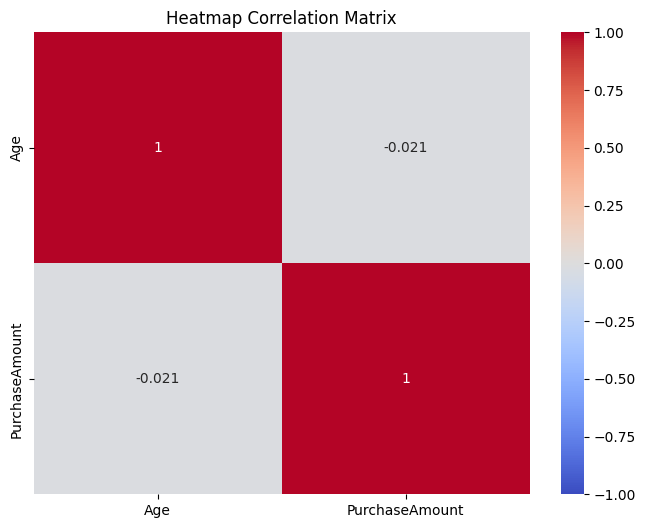

In [322]:
# Calculate the correlation matrix
corr_matrix = sales_data[['Age', 'PurchaseAmount']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Correlation Matrix')
plt.show()


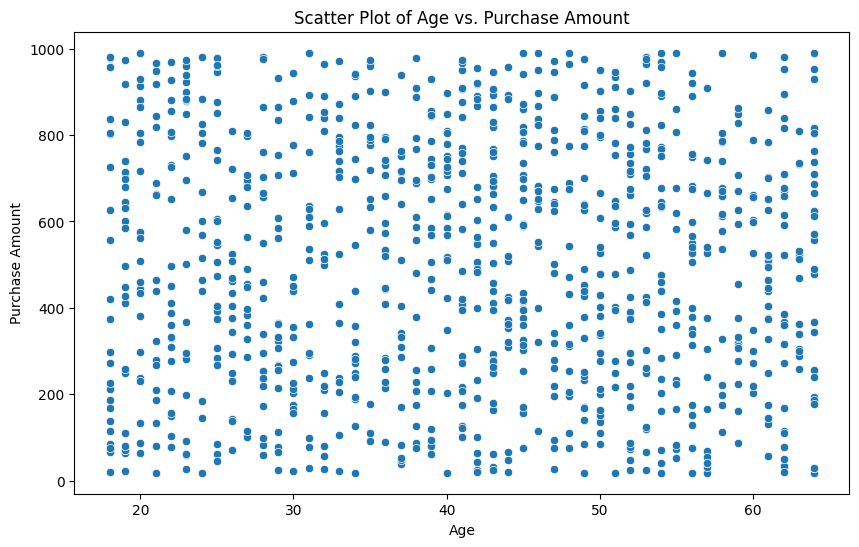

In [323]:
# Scatter plot of Age vs. Purchase Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PurchaseAmount', data=sales_data)
plt.title('Scatter Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()


Problem statment 4

In [324]:
# Calculate the number of unique customers in each region
unique_customers_by_region = sales_data.groupby('Region')['CustomerID'].nunique().reset_index()
unique_customers_by_region.columns = ['Region', 'UniqueCustomers']

# Calculate the total number of unique customers
total_unique_customers = sales_data['CustomerID'].nunique()

# Find the region with the highest and lowest number of unique customers
highest_unique_customers_region = unique_customers_by_region.loc[unique_customers_by_region['UniqueCustomers'].idxmax()]
lowest_unique_customers_region = unique_customers_by_region.loc[unique_customers_by_region['UniqueCustomers'].idxmin()]

print(f"Total number of unique customers: {total_unique_customers}")
print(f"Region with the highest number of unique customers: {highest_unique_customers_region['Region']} ({highest_unique_customers_region['UniqueCustomers']})")
print(f"Region with the lowest number of unique customers: {lowest_unique_customers_region['Region']} ({lowest_unique_customers_region['UniqueCustomers']})")


Total number of unique customers: 982
Region with the highest number of unique customers: South (261)
Region with the lowest number of unique customers: East (234)


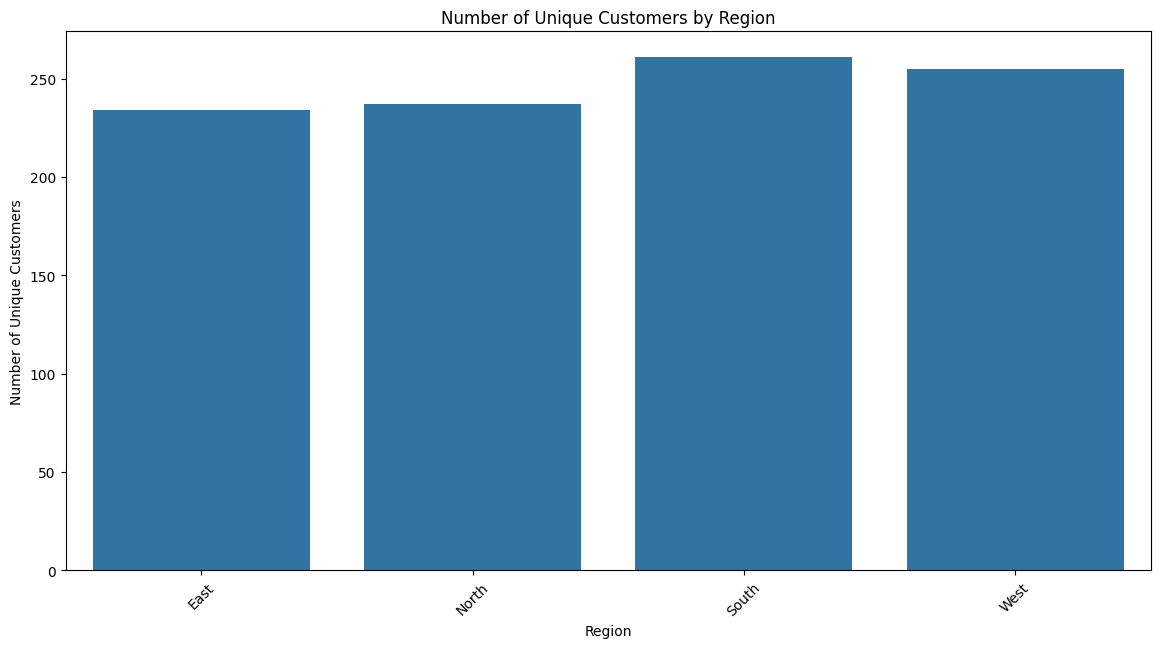

In [325]:
# Plotting the number of unique customers in each region
plt.figure(figsize=(14, 7))
sns.barplot(x='Region', y='UniqueCustomers', data=unique_customers_by_region)
plt.title('Number of Unique Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.show()



Problem statment 5

In [326]:
# Calculate the total purchase amount for each payment method
total_purchase_by_payment_method = sales_data.groupby('PaymentMethod')['PurchaseAmount'].sum().reset_index()

# Identify the different payment methods available
payment_methods = total_purchase_by_payment_method['PaymentMethod'].unique()
print(f"Different payment methods available: {payment_methods}")

# Display the total purchase amount for each payment method
print(total_purchase_by_payment_method)


Different payment methods available: ['Cash' 'Credit Card' 'Debit Card']
  PaymentMethod  PurchaseAmount
0          Cash   176118.647232
1   Credit Card   168436.278262
2    Debit Card   157946.641151


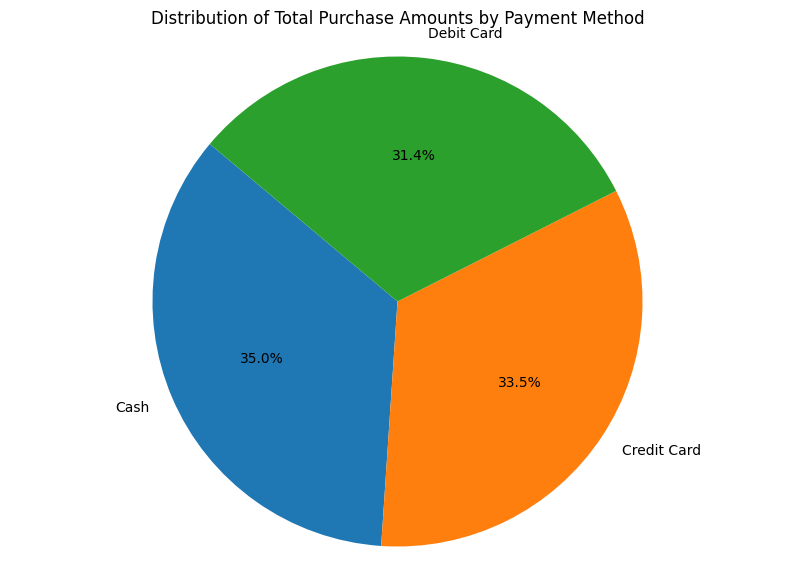

In [327]:
# Plotting the pie chart for total purchase amount by payment method
plt.figure(figsize=(10, 7))
plt.pie(total_purchase_by_payment_method['PurchaseAmount'], labels=total_purchase_by_payment_method['PaymentMethod'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Purchase Amounts by Payment Method')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Problem statment 6

In [328]:
import os

# Remove the existing database file
if os.path.exists('sales.db'):
    os.remove('sales.db')

# Create a new database engine
db_engine = create_engine('sqlite:///sales.db')

# Load the data into the new database
load_data(sales_data, db_engine)

In [329]:
import pandas as pd
from sqlalchemy import create_engine

# Step 1: Data Extraction done earlier
# Step 2: Data Transformation also done earlier
# Step 3: Data Loading
def load_data(sales_data, db_engine):
    # Load data into SQL database
    sales_data.to_sql('salesdata', db_engine, if_exists='replace', index=False)

def main():
    # Database connection string (using SQLite for simplicity)
    db_engine = create_engine('sqlite:///sales.db')

    # Run the pipeline
    load_data(sales_data, db_engine)

    # Verify the data was loaded
    result = pd.read_sql('SELECT * FROM salesdata LIMIT 5', db_engine)
    print(result)

if __name__ == '__main__':
    main()

   Unnamed: 0  CustomerID   Age  Gender Location  ProductCategory  \
0        9.99       10.99  56.0    Male   Suburb         Clothing   
1        9.99       10.99  46.0  Female    Rural  Home Appliances   
2        9.99       10.99  42.0  Female   Suburb  Home Appliances   
3        9.99       10.99  60.0  Female   Suburb      Electronics   
4        9.99       10.99  25.0    Male   Suburb         Clothing   

  PurchaseDate  PurchaseAmount PaymentMethod  Quantity  DiscountPercentage  \
0   2022-01-01       18.232007    Debit Card         5            0.300396   
1   2022-01-02      990.778788          Cash         5            0.350433   
2   2022-01-03      955.564055    Debit Card         8            0.142603   
3   2022-01-04      527.350833          Cash         9            0.315385   
4   2022-01-10      306.570021   Credit Card         9            0.227825   

   IsReturned  Rating  IsPromotion CustomerSegment  ShippingDuration Region  \
0           0       2            0   

Problem statment 7

In [330]:

from sqlalchemy import create_engine

# Example SQL ingestion
# Adjust the connection string as needed
engine = create_engine('sqlite:///sales.db')  # Using SQLite for simplicity
sales_data.to_sql('salesdata', engine, if_exists='replace', index=False)

# Verify the data was written
query_result = pd.read_sql('SELECT * FROM salesdata LIMIT 5', engine)
print(query_result)

   Unnamed: 0  CustomerID   Age  Gender Location  ProductCategory  \
0        9.99       10.99  56.0    Male   Suburb         Clothing   
1        9.99       10.99  46.0  Female    Rural  Home Appliances   
2        9.99       10.99  42.0  Female   Suburb  Home Appliances   
3        9.99       10.99  60.0  Female   Suburb      Electronics   
4        9.99       10.99  25.0    Male   Suburb         Clothing   

  PurchaseDate  PurchaseAmount PaymentMethod  Quantity  DiscountPercentage  \
0   2022-01-01       18.232007    Debit Card         5            0.300396   
1   2022-01-02      990.778788          Cash         5            0.350433   
2   2022-01-03      955.564055    Debit Card         8            0.142603   
3   2022-01-04      527.350833          Cash         9            0.315385   
4   2022-01-10      306.570021   Credit Card         9            0.227825   

   IsReturned  Rating  IsPromotion CustomerSegment  ShippingDuration Region  \
0           0       2            0   

Problem statment 8

In [331]:

# Example of chunking CSV ingestion
chunk_size = 10000
chunks = pd.read_csv('/content/clean_sales_Data.csv', chunksize=chunk_size)
for chunk in chunks:
    chunk.to_sql('salesdata', engine, if_exists='append', index=False)

# Document optimization techniques:
# 1. Use chunking for large CSV files to avoid memory overload.
# 2. Use multiprocessing to parallelize API calls.
# 3. Optimize SQL queries to fetch only necessary columns and rows.
# 4. Compress data before storing in the data lake.
# 5. Use efficient data formats like Parquet for storage.
# 6. Implement indexing in the SQL database for faster queries.


Problem statment 9

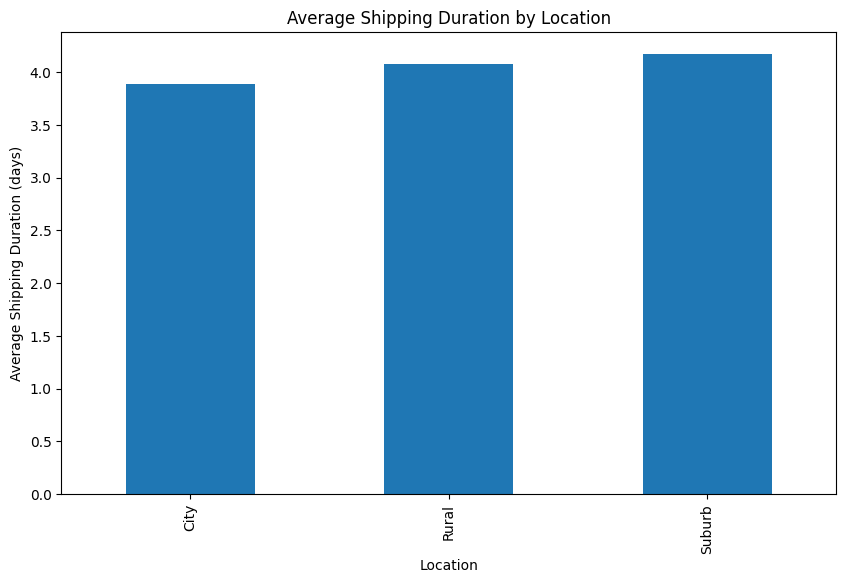

Average Shipping Duration per Location:
 Location
City      3.886628
Rural     4.081433
Suburb    4.171920
Name: ShippingDuration, dtype: float64


In [333]:

# Average shipping duration per location
avg_shipping_duration_per_location = sales_data.groupby('Location')['ShippingDuration'].mean()
plt.figure(figsize=(10, 6))
avg_shipping_duration_per_location.plot(kind='bar')
plt.title('Average Shipping Duration by Location')
plt.ylabel('Average Shipping Duration (days)')
plt.show()

print("Average Shipping Duration per Location:\n", avg_shipping_duration_per_location)

Problem Statment 10

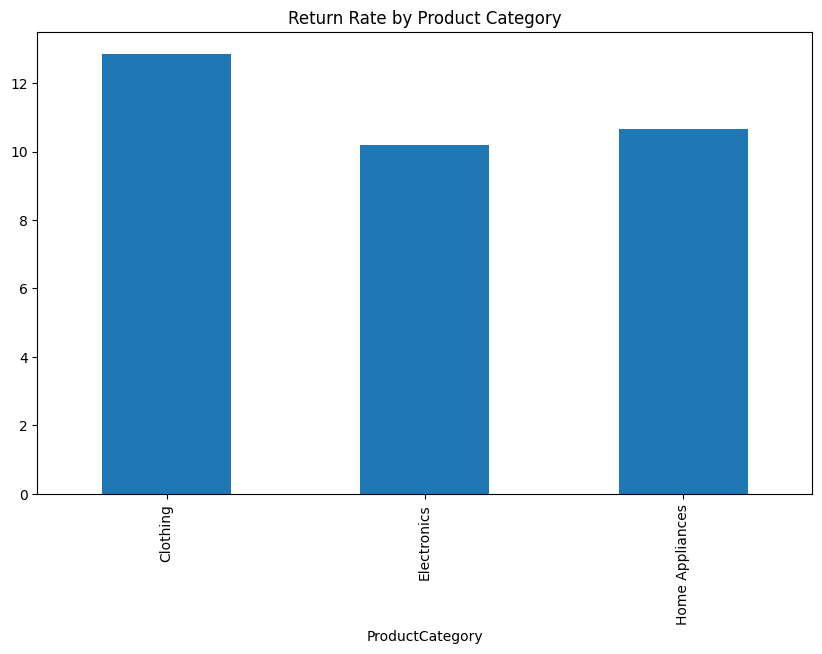

In [338]:
# problem statement 10
# Return rate per product category
return_rate_per_category = sales_data.groupby('ProductCategory')['IsReturned'].mean() * 100
plt.figure(figsize=(10, 6))
return_rate_per_category.plot(kind='bar')
plt.title('Return Rate by Product Category')
plt.show()